## PROBLEM STATEMENT 1-
### identify the number of clusters formed and draw inferences.


In [75]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


import warnings
warnings.filterwarnings("ignore")

In [5]:
## Reading the data

In [12]:
crime = pd.read_csv("E:\\deeksha\\python\\data\\crime_data.csv")

In [13]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [16]:
# Normalization function
# using sklearn library norm

def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [17]:
# Normalized data frame (considering the numerical part of data)
df_crime = norm_func(crime.iloc[:,1:])


In [18]:
df_crime.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


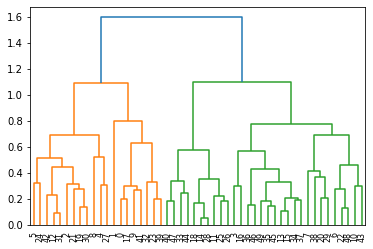

In [12]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_crime, method='complete'))

In [13]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')


In [14]:
hc.fit(df_crime)
# hc.predict(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [15]:
# save clusters for chart
y_hc = hc.fit_predict(df_crime)
# Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [11]:
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [16]:
crime['h_clusterid'] = y_hc

In [17]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [14]:
crime1=crime.sort_values("h_clusterid")
crime1.iloc[:,[0,-1]]

,Unnamed: 0,h_clusterid
0,Alabama,0
17,Louisiana,0
23,Mississippi,0
32,North Carolina,0
39,South Carolina,0
9,Georgia,0
1,Alaska,0
41,Tennessee,0
43,Utah,1
38,Rhode Island,1


## using K-Mean Clustering Method

In [8]:
## using k-mean clustering 
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=4,random_state=0)
predict=kmeans.fit_predict(df_crime)

In [20]:
predict

array([2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 3, 0, 1, 3, 1, 3, 2, 3, 0, 1, 0,
       3, 2, 1, 3, 3, 0, 3, 1, 0, 0, 2, 3, 1, 1, 1, 1, 1, 2, 3, 2, 0, 1,
       3, 1, 1, 3, 3, 1])

In [33]:
## using elbow curv for plotting

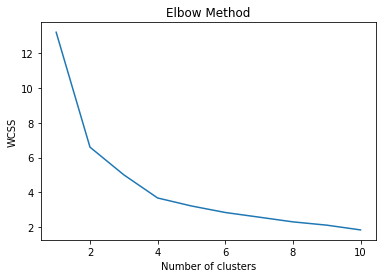

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_crime)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
#Building Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(df_crime)

KMeans(n_clusters=3, random_state=42)

In [25]:
clusters_new.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [26]:
#Assign clusters to the data set
crime['clusterid_new'] = clusters_new.labels_

In [28]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [30]:
crime.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.841176,141.882353,72.470588,18.823529
1,1,12.165000,255.250000,68.400000,29.165000
2,2,3.600000,78.538462,52.076923,12.176923


In [32]:
crime[crime['clusterid_new']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2


In [34]:
## using silhouette score

In [37]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [38]:
silhouette_score_average = silhouette_score(df_crime, predict)

In [39]:
silhouette_score_average

0.3408903560074363

## using DB-SCAN CLUSTERING

### Building A Model

In [90]:
array = df_crime.values

In [91]:
array

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [93]:
stscaler = StandardScaler().fit(array)

In [95]:
dbscan = DBSCAN(eps=0.9, min_samples=2)
dbscan.fit(X)

DBSCAN(eps=0.9, min_samples=2)

In [96]:
dbscan.labels_


array([0, 0, 0, ..., 3, 0, 0], dtype=int64)

In [97]:
len(dbscan.core_sample_indices_)


3389

In [98]:
#Indexes of core data points
dbscan.core_sample_indices_

array([   0,    1,    2, ..., 3996, 3997, 3998], dtype=int64)

In [99]:
dbscan.components_

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01, -7.03721163e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01, -7.03721163e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01, -7.03721163e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -7.03721163e-01],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -7.03721163e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -7.03721163e-01]])

## PROBLEM STATEMENT 2-
### Perform clustering for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

In [20]:
## Reading the data

In [43]:
xls = pd.ExcelFile('E:\\deeksha\\python\\data\\EastWestAirlines.xlsx')
df_air = pd.read_excel(xls, 'data')

In [21]:
## Performing EDA on data

In [44]:
df_air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [17]:
df_air.shape


(3999, 12)

In [22]:
df_air.size

47988

In [23]:
df_air.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [45]:
X = df_air.iloc[:,:-1]

In [46]:
y= df_air["Award?"]

In [26]:
X.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1,28143,0,1,1,1,174,1,0,0,7000
1,2,19244,0,1,1,1,215,2,0,0,6968
2,3,41354,0,1,1,1,4123,4,0,0,7034
3,4,14776,0,1,1,1,500,1,0,0,6952
4,5,97752,0,4,1,1,43300,26,2077,4,6935


In [27]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Award?, dtype: int64

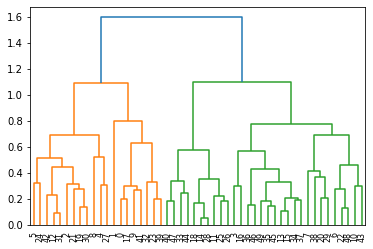

In [28]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_crime, method='complete'))

In [29]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')


In [30]:
hc.fit(df_air)
# hc.predict(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [31]:
# save clusters for chart
y_hc = hc.fit_predict(df_air)
# Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [32]:
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
df_air['h_clusterid'] = y_hc

In [34]:
df_air1=df_air.sort_values("h_clusterid")
df_air1.iloc[:,[0,-1]]

,ID#,h_clusterid
0,1,0
2658,2678,0
2659,2679,0
2660,2680,0
2661,2681,0
...,...,...
117,120,2
1939,1956,2
1115,1127,2
1188,1200,2


In [51]:
# Standardisation function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_air = scaler.fit_transform(df_air.iloc[:,:-1])

In [52]:
scaled_df_air

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

## using K-Mean Clustering Method

In [53]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [55]:
kmeans = KMeans(n_clusters=4,random_state=0)
predict=kmeans.fit_predict(scaled_df_air)

In [56]:
predict

array([3, 3, 3, ..., 1, 1, 1])

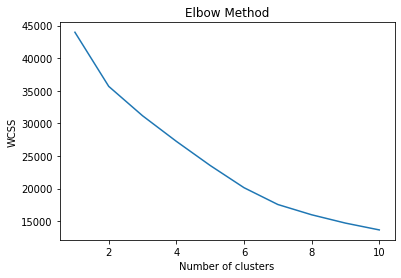

In [57]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df_air)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
#K-Means: Inertia
#Inertia measures how well a dataset was clustered by K-Means.
#It is calculated by measuring the distance between each data point and its centroid,
#squaring this distance, and summing these squares across one cluster.
 #A good model is one with low inertia AND a low number of clusters ( K ).

## Building Model

In [60]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_df_air)

KMeans(n_clusters=3, random_state=42)

In [61]:
clusters_new.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
#Assign clusters to the data set
df_air['clusterid_new'] = clusters_new.labels_

In [63]:
df_air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [65]:
df_air.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2333.425175,42606.823461,102.573655,1.253702,1.019486,1.000000,5086.816056,7.077553,207.892829,0.639127,3539.907249,0.248246
1,1,1405.075710,120650.825710,144.925079,3.673502,1.001577,1.036278,39629.436120,18.727129,327.373028,0.983438,5217.205836,0.563091
2,2,1745.806061,194044.563636,783.909091,2.187879,1.036364,1.018182,31874.818182,27.206061,5401.218182,15.793939,4674.545455,0.787879


In [66]:
df_air[df_air['clusterid_new']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,2
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,2
22,23,20584,0,1,1,1,3450,11,3450,11,6884,0,2
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,2
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,2
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,2
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,2
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,2


In [67]:
df_air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [68]:
## using silhouette score

In [69]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [71]:
silhouette_score_average = silhouette_score(scaled_df_air, predict)

In [72]:
silhouette_score_average

0.2658949422439895

In [73]:
silhouette_score_average1 = silhouette_score(scaled_df_air, clusters_new.predict(scaled_df_air))

In [74]:
silhouette_score_average1

0.3027351242855637

## Using DB-SCAN CLUSTERING

### Building A Model

In [81]:
array=df_air.values


In [82]:
array

array([[    1, 28143,     0, ...,  7000,     0,     0],
       [    2, 19244,     0, ...,  6968,     0,     0],
       [    3, 41354,     0, ...,  7034,     0,     0],
       ...,
       [ 4019, 73597,     0, ...,  1402,     1,     0],
       [ 4020, 54899,     0, ...,  1401,     0,     0],
       [ 4021,  3016,     0, ...,  1398,     0,     0]], dtype=int64)

In [83]:
stscaler = StandardScaler().fit(array)


In [84]:
X = stscaler.transform(array)

In [85]:
dbscan = DBSCAN(eps=0.9, min_samples=2)
dbscan.fit(X)

DBSCAN(eps=0.9, min_samples=2)

In [86]:
dbscan.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int64)

In [87]:
len(dbscan.core_sample_indices_)

3389

In [88]:
#Indexes of core data points
dbscan.core_sample_indices_

array([   0,    1,    2, ..., 3996, 3997, 3998], dtype=int64)

In [89]:
#core data points
dbscan.components_

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01, -7.03721163e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01, -7.03721163e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01, -7.03721163e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -7.03721163e-01],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -7.03721163e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -7.03721163e-01]])